***Datos sobre las plantaciones en antioquia***

In [1]:
#importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

***Leemos el dataset por medio de la libreria pandas***

In [2]:
data_fields = pd.read_csv('Areas_cultivadas_y_produccion_agr_cola_en_Antioquia_desde_1990-2022_20250716.csv')
display(data_fields.info())
display(data_fields.head(10))
data_fields.dropna(inplace=True) #elimina las columnas no null
data_fields.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32721 entries, 0 to 32720
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo                32721 non-null  object 
 1   Rubro               32721 non-null  object 
 2   Subregion           32721 non-null  object 
 3   Año                 32721 non-null  int64  
 4   Municipio           32721 non-null  object 
 5   Área Total          32680 non-null  float64
 6   Área Producción     32287 non-null  float64
 7   Volumen Producción  32535 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ MB


None

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,45.0,23.0,138.00
1,Permanentes,Aguacate,Urabá,1990,Apartadó,29.0,27.0,405.00
2,Permanentes,Aguacate,Suroeste,1990,Montebello,17.0,12.0,78.00
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,150.0,140.0,980.00
4,Permanentes,Aguacate,Urabá,1990,Turbo,75.0,55.0,825.00
5,Transitorios,Anis,Occidente,1990,Giraldo,35.0,33.5,17.40
6,Transitorios,Arroz Tecnificado,Bajo Cauca,1990,Cáceres,450.0,450.0,900.00
7,Transitorios,Arroz Tecnificado,Bajo Cauca,1990,Caucasia,1700.0,1700.0,6399.99
8,Transitorios,Arroz Tecnificado,Urabá,1990,Mutatá,750.0,355.0,1719.98
9,Transitorios,Arroz Tecnificado,Bajo Cauca,1990,Nechí,1550.0,1480.0,4771.96


Tipo                  0
Rubro                 0
Subregion             0
Año                   0
Municipio             0
Área Total            0
Área Producción       0
Volumen Producción    0
dtype: int64

***Normalizamos los datos***

In [3]:
numerical_features = ["Área Total", "Área Producción", "Volumen Producción"]
scaler = MinMaxScaler()
data_fields[numerical_features] = scaler.fit_transform(data_fields[numerical_features])
display(data_fields.head())

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,Abejorral,0.001250,0.000639,0.000133
1,Permanentes,Aguacate,Urabá,1990,Apartadó,0.000806,0.000750,0.000390
2,Permanentes,Aguacate,Suroeste,1990,Montebello,0.000472,0.000333,0.000075
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,0.004167,0.003889,0.000943
4,Permanentes,Aguacate,Urabá,1990,Turbo,0.002083,0.001528,0.000794


***Eficiencia relativa***


In [4]:
data_fields["eficiencia_relativa"] = data_fields["Volumen Producción"] / data_fields["Área Producción"]
data_fields["eficiencia_relativa"] = data_fields["eficiencia_relativa"].fillna(0)  # Reemplaza NaN con 0
display(data_fields.head())

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción,eficiencia_relativa
0,Permanentes,Aguacate,Oriente,1990,Abejorral,0.001250,0.000639,0.000133,0.207836
1,Permanentes,Aguacate,Urabá,1990,Apartadó,0.000806,0.000750,0.000390,0.519590
2,Permanentes,Aguacate,Suroeste,1990,Montebello,0.000472,0.000333,0.000075,0.225156
3,Permanentes,Aguacate,Suroeste,1990,Santa Bárbara,0.004167,0.003889,0.000943,0.242476
4,Permanentes,Aguacate,Urabá,1990,Turbo,0.002083,0.001528,0.000794,0.519590


***Codificacion de los datos string***


In [10]:
categoria_column = [ "Rubro", "Municipio", "Tipo", "Subregion"]
for col in categoria_column:
    data_fields[col] = data_fields[col].astype("category")

data_encode = pd.get_dummies(data_fields, columns=categoria_column, drop_first=False)
data_encode

encode_columns = data_encode.columns.difference(data_fields.columns)
data_encode[encode_columns] = data_encode[encode_columns].astype(int)
data_encode.head()

data_encode["Volumen Producción"] = LabelEncoder().fit_transform(data_encode["Volumen Producción"])
data_encode.head()

,Año,Área Total,Área Producción,Volumen Producción,eficiencia_relativa,Rubro_ALGODÓN,Rubro_Acelga,Rubro_Achin,Rubro_Achiote,Rubro_Achiote (Bija),...,Tipo_Transitorios,Subregion_Bajo Cauca,Subregion_Magdalena Medio,Subregion_Nordeste,Subregion_Norte,Subregion_Occidente,Subregion_Oriente,Subregion_Suroeste,Subregion_Urabá,Subregion_Valle de Aburra
0,1990,0.001250,0.000639,1423,0.207836,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1990,0.000806,0.000750,2646,0.519590,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1990,0.000472,0.000333,975,0.225156,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1990,0.004167,0.003889,4084,0.242476,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1990,0.002083,0.001528,3783,0.519590,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
numerical_data = data_encode.select_dtypes(include = ['float64', 'int64'])
numerical_data

correclation_matrix = numerical_data.corr()
if 'Volumen Producción' in correclation_matrix.columns:
    target_correlation = correclation_matrix['Volumen Producción'].sort_values(ascending=False)
    print("Correlación de cada característica con volumen Producción:", target_correlation)
else:
    print(" no está en el DataFrame numérico.")

correlation_threshold = 0.1
select_features = target_correlation[abs(target_correlation) > correlation_threshold].index.tolist()
select_features.remove('Volumen Producción')  # Eliminar la variable objetivo
data_selected = numerical_data[select_features]
data_selected 

Correlación de cada característica con volumen Producción: Volumen Producción          1.000000
Rubro_Banano Exportación    0.760172
Área Producción             0.538111
Área Total                  0.515676
Municipio_Turbo             0.198162
                              ...   
Año                        -0.029823
Rubro_Maíz Tradicional     -0.029854
Subregion_Suroeste         -0.032990
Tipo_Transitorios          -0.034499
Subregion_Occidente        -0.048193
Name: Volumen Producción, Length: 310, dtype: float64


,Rubro_Banano Exportación,Área Producción,Área Total,Municipio_Turbo,eficiencia_relativa,Subregion_Urabá,Rubro_Plantaciones Forestales,Municipio_Apartadó,Municipio_Carepa
0,0,0.000639,0.001250,0,0.207836,0,0,0,0
1,0,0.000750,0.000806,0,0.519590,1,0,1,0
2,0,0.000333,0.000472,0,0.225156,0,0,0,0
3,0,0.003889,0.004167,0,0.242476,0,0,0,0
4,0,0.001528,0.002083,1,0.519590,1,0,0,0
...,...,...,...,...,...,...,...,...,...
32716,0,0.000083,0.000083,0,0.173197,0,0,0,0
32717,0,0.000194,0.000639,0,0.069279,0,0,0,0
32718,0,0.000333,0.000333,0,0.173197,1,0,0,0
32719,0,0.000583,0.000583,0,0.467631,0,0,0,0


***Matriz de correlacion***


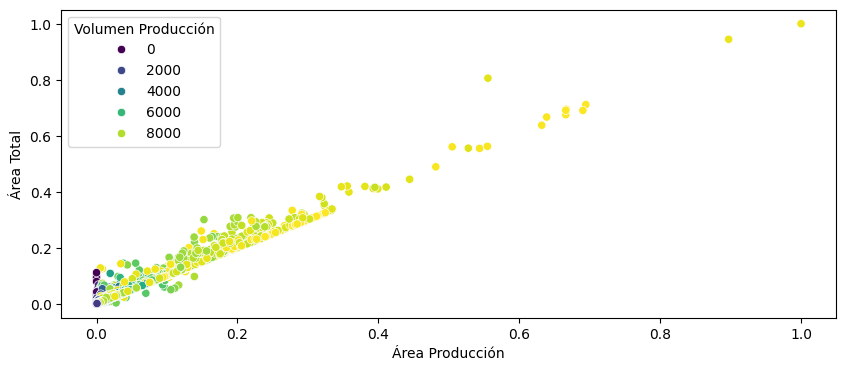

In [11]:
data = data_encode
data["Volumen Producción"] = LabelEncoder().fit_transform(data["Volumen Producción"])
data

plt.figure(figsize=(10,4))
sns.scatterplot(x=data['Área Producción'],y=data['Área Total'],hue=data['Volumen Producción'], palette='viridis');

***Machine learning***


In [ ]:
x = data_encode.drop(columns=["Volumen Producción"])
y = data_encode["Volumen Producción"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)